In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


Bringing up dataset

In [6]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [8]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


correlation visualization

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

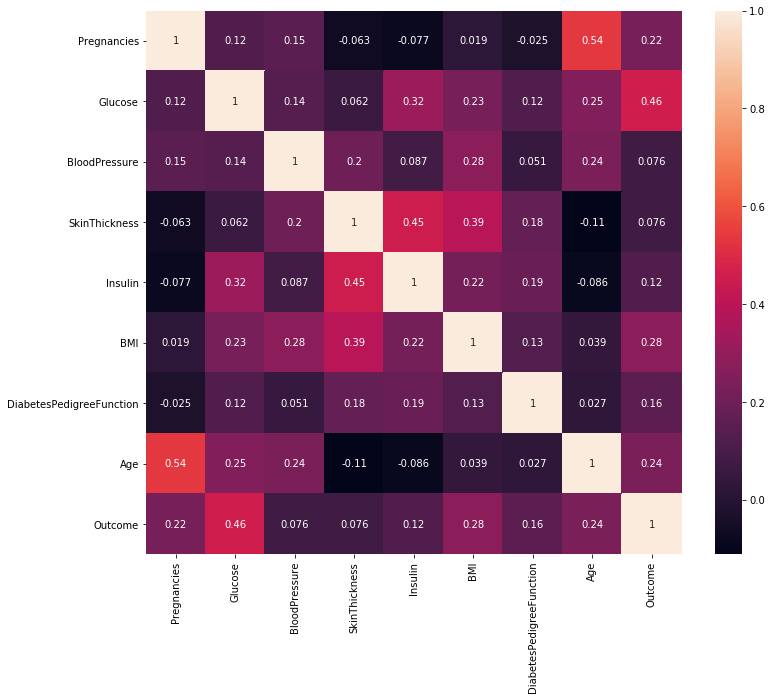

In [10]:
f, ax = plt.subplots(1, figsize=(12,10))
sns.heatmap(data.corr(), annot=True, ax=ax)

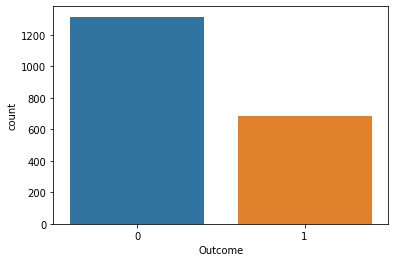

In [11]:
sns.countplot(x=data.Outcome)

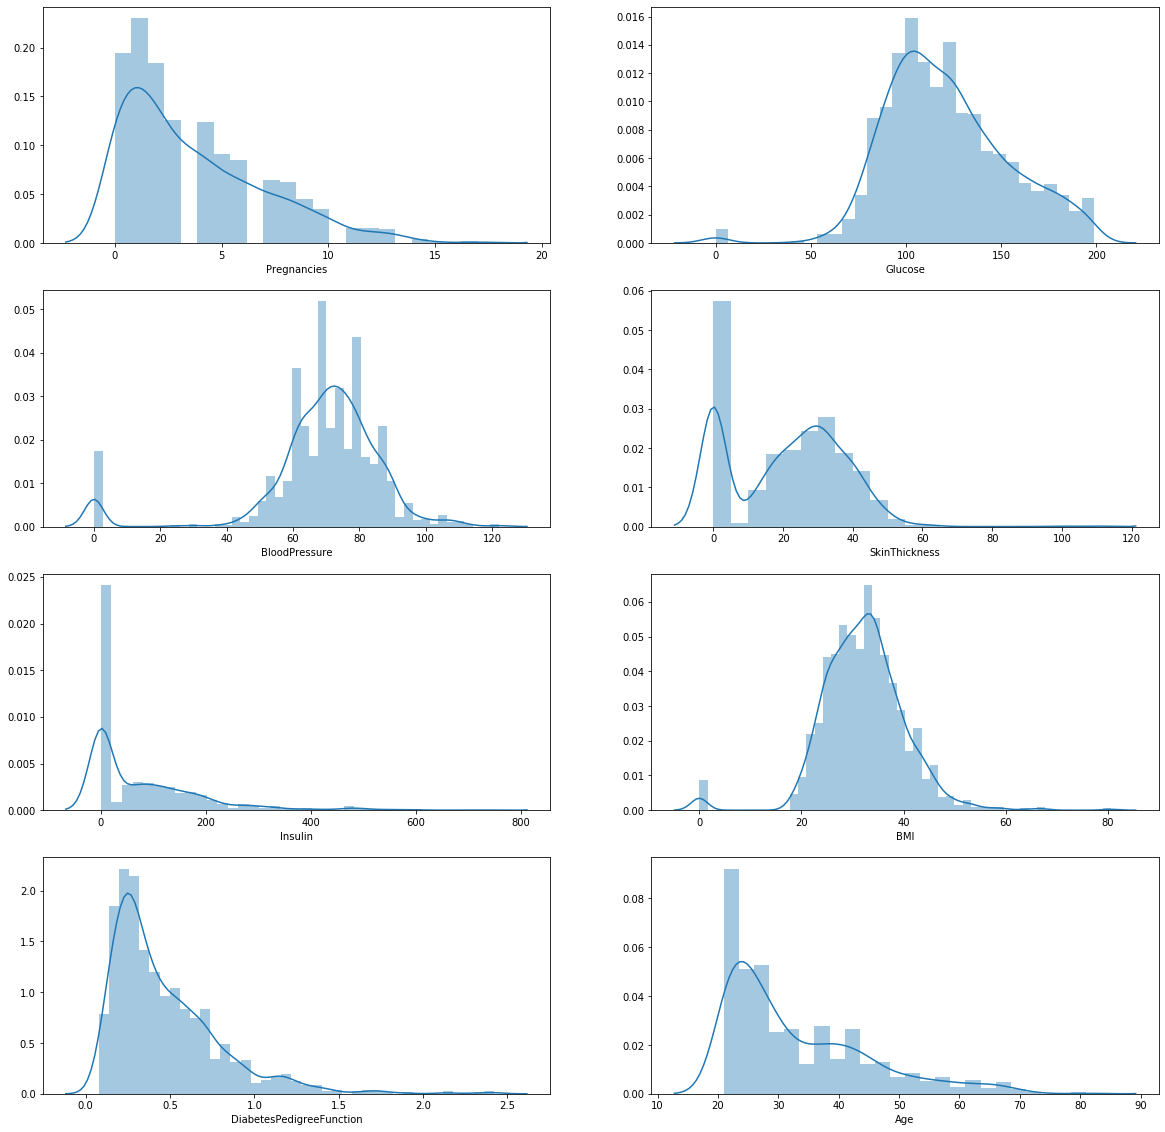

In [12]:
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.distplot(data.Pregnancies, ax=axes[0,0])
sns.distplot(data.Glucose, ax=axes[0,1])
sns.distplot(data.BloodPressure, ax=axes[1,0])
sns.distplot(data.SkinThickness, ax=axes[1,1])
sns.distplot(data.Insulin, ax=axes[2,0])
sns.distplot(data.BMI, ax=axes[2,1])
sns.distplot(data.DiabetesPedigreeFunction, ax=axes[3,0])
sns.distplot(data.Age, ax=axes[3,1])

CHECKING FOR MISSING DATA

In [13]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

CHECKING FOR NULL VALUES

In [14]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

seprating descriptive features from the target

In [15]:
X = data.iloc[:, 0:8]

In [16]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21
...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33
1996,8,179,72,42,130,32.7,0.719,36
1997,6,85,78,0,0,31.2,0.382,42
1998,0,129,110,46,130,67.1,0.319,26


In [17]:
y = data.iloc[:, -1]

In [18]:
y

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64

SPLITTING DATA FOR TRAIN AND TEST

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Standardization

In [20]:
#from sklearn.preprocessing import Normalizer
#scaler = Normalizer()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)

spliting the "test" data into test and dev

In [21]:
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2)
#X_dev = scaler.transform(X_dev)
#X_test = scaler.transform(X_test)

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


ab_clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    learning_rate=0.5,
    random_state=100)

ab_clf.fit(X_train, y_train)

y_pred = ab_clf.predict(X_test)
ab_clf_score = ab_clf.score(X_test, y_test)
print("\nmean accuracy: %.2f" % ab_clf.score(X_test, y_test))


mean accuracy: 0.96


In [26]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       196
           1       0.91      0.97      0.94       104

    accuracy                           0.96       300
   macro avg       0.95      0.96      0.95       300
weighted avg       0.96      0.96      0.96       300

Confusion Matrix:
 [[186  10]
 [  3 101]]
Mean Squared Error:
 0.043333333333333335
R2 score is:
 0.8086734693877551
